#1. Comportamiento del cliente- Walmart

Este dataset está diseñado para analizar y entender el comportamiento de compras de los clientes, con el objetivo de identificar patrones, tendencias y segmentación claves. Puede ser útil para mejorar estrategias de marketing, optimizar inventarios y personalizar experiencia del cliente

# 2. Descripción de las Variables
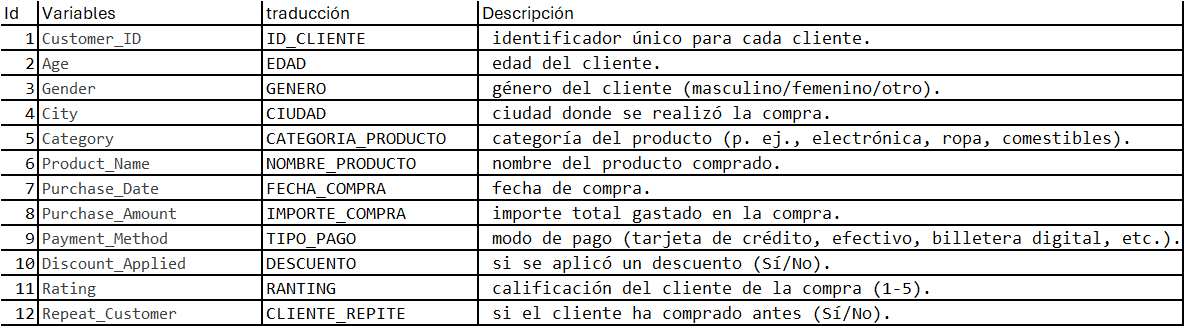

#3. Librerias a utilizar :
   
*  Calidad de los datos: pandas y numpy
*  Visualizacion: matplotlib y searborn




In [2]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##3.1 Cargar el archivo de google colab

In [3]:
# Cargar archivos de google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##3.2 Crear la ruta y cargar el archivo csv con read_csv pandas

In [4]:
# Crear una variable que se llame ruta
# abrir el archivo con el metodo pd.read_csv()
# llamo los 10 primeros registros
ruta = "/content/drive/MyDrive/Comportamiento de compra/Walmart_customer_purchases.csv"
dato= pd.read_csv(ruta)
dato.head(10)

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes
5,fdf82943-1b5f-4e0a-bf42-9a8e2035924e,59,Female,North Josemouth,Electronics,Laptop,2024-02-15,435.48,Cash on Delivery,No,3,No
6,582e8439-2b9b-46bd-93ff-71d610f455cc,47,Male,Johnsonton,Beauty,Perfume,2024-12-19,231.04,Debit Card,No,4,Yes
7,664555b7-7fd7-44a8-b4da-ec00230381b9,23,Other,Hoffmanmouth,Home,Sofa Cover,2024-09-28,240.91,Cash on Delivery,No,2,No
8,a8e37b6a-d34c-4d21-84fc-ef713d4859be,60,Female,South Billyberg,Beauty,Shampoo,2025-01-30,179.76,UPI,Yes,5,Yes
9,fa3bfd3a-99a4-41c7-bebc-8b04dc4c95f7,52,Female,North Katherinemouth,Home,Cookware,2024-12-23,463.43,Cash on Delivery,Yes,3,No


#4. Exploracion de los datos:
revision de la estructura de los datos

##4.1 Preparacion de los datos

### 4.1.1 Limpieza de los datos

###4.1.1.1 identificar el tipo de datos, valores nulos, duplicidad, cantidad de registros de las variables,número de variables

In [5]:
### Generar una tabla que muestre, la variable, el tipo de datos, cantidad de registros, valores nulos, y un ejemplo
def analizar_dataframe(df):
    # Identificar el tipo de variables y valores faltantes
    unique = []
    dtyp = []
    vnull = []
    cantregis=[]


    for col in df:
        unique.append(df[col].unique()[0])
        dtyp.append(df[col].dtype)
        vnull.append(df[col].isnull().sum())
        cantregis.append(df[col].shape[0])


    result_trans = pd.DataFrame({
        "Columnas": df.columns,
        "cantidad de registros": cantregis,
        "Tipo de Datos": dtyp,
        "Valores Nulos": vnull,
        "Valor Único": unique


    })

    cantidad_columnas = df.shape[1]
    cantidad_registros = df.shape[0]
    duplicados = df.duplicated().sum()

    print(f'Cantidad de Columnas: {cantidad_columnas}')
    print(f'Valores Duplicados: {duplicados}')

    print('\n')


    return result_trans

In [6]:
# utilizar la función
analizar_dataframe(dato)

Cantidad de Columnas: 12
Valores Duplicados: 0




,Columnas,cantidad de registros,Tipo de Datos,Valores Nulos,Valor Único
0,Customer_ID,50000,object,0,84607c1f-910c-44d5-b89f-e1ee06dd34c0
1,Age,50000,int64,0,49
2,Gender,50000,object,0,Female
3,City,50000,object,0,New Cynthia
4,Category,50000,object,0,Electronics
5,Product_Name,50000,object,0,Smartphone
6,Purchase_Date,50000,object,0,2024-08-30
7,Purchase_Amount,50000,float64,0,253.26
8,Payment_Method,50000,object,0,Cash on Delivery
9,Discount_Applied,50000,object,0,No


####Interpretación de las variables:
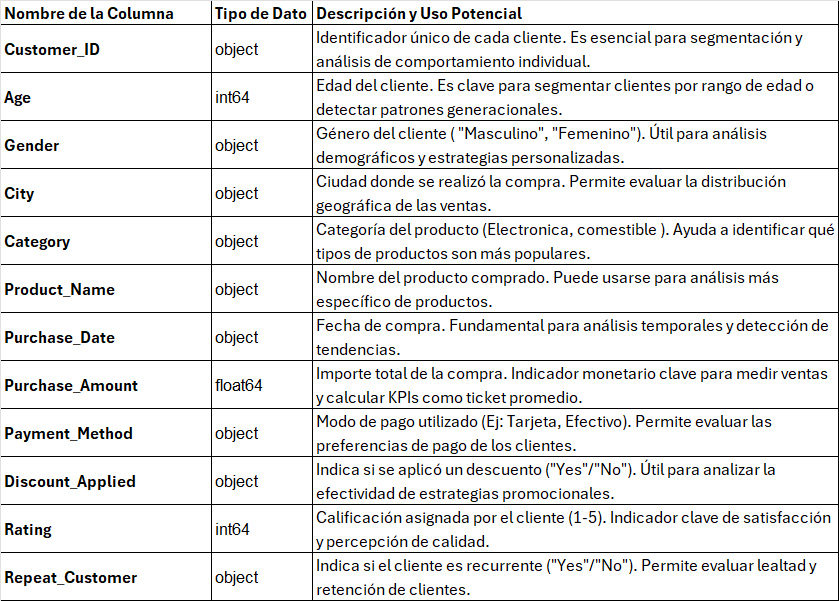


####Observación:
Cantidad de Columnas: 12 columna/variables

Cantidad de Registros: Contiene un total de 50,000 registros

Valores Duplicados: No presenta valores duplicados. Asegurando la unicidad de los registros, lo que es fundamental para mantener la integridad de los datos y evitar inconsistencias en el análisis.

Variable "Purchase_date" (fecha de compra) se debe comvertir a tipo de dato: date, con el fin de tener un mejor analisis para tendencia.







Nota otros metodos que puedes utilizar para ver el numero de filas y columnas es shape() y para obtener informacion de los valores nulos por columna y el tipo de datos, con el metodo info()


tambien se puede usar los metodos shape() y info()

###4.1.1.2 Estadísticas básicas

In [7]:
# determinar Estadísticas básicas para el tipo de datos numericos:
dato.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,38.94522,12.398137,18.00,28.00,39.000,50.0000,60.00
Purchase_Amount,50000.0,255.53223,141.574416,10.01,133.05,255.045,378.9125,499.99
Rating,50000.0,2.99868,1.417956,1.00,2.00,3.000,4.0000,5.00


###Observaciones sobre las Estadísticas Básicas:
    1.	Columna Age (Edad del cliente):
          Rango de Edad: Los valores oscilan entre 18 años y 60 años, lo que indica que la base de datos incluye tanto clientes jóvenes como maduros.
          Distribución General: La mediana es de 39 años, lo que sugiere que la mayoría de los clientes se encuentra en un rango adulto.
          Desviación Estándar: La variabilidad en las edades es moderada (12.39), indicando que hay una distribución razonablemente amplia entre los diferentes grupos etarios.
    2.	Columna Purchase_Amount (Monto de Compra):
          Rango de Gastos: Los valores fluctúan desde compras pequeñas de $10.01 hasta un máximo de $499.99.
  	      Gasto Promedio: El monto promedio por compra es de $255.53, siendo un indicador importante para estrategias de precios y promociones.
          Distribución de Datos: La desviación estándar es alta (141.57), lo que señala variaciones significativas en los importes gastados, posiblemente debido a diferencias en las categorías de productos comprados.

    3.	Columna Rating (Calificación):
          Rango de Calificaciones: Van desde 1 hasta 5, cumpliendo con lo esperado para un sistema de evaluación estándar.
          Promedio de Calificaciones: La calificación promedio es 3, lo que sugiere una percepción general de satisfacción moderada entre los clientes.
          Distribución: La desviación estándar es baja (1.42), lo que indica que la mayoría de las calificaciones se agrupan en torno a la media, con pocos valores extremos.



In [8]:
# Determinar estadísticas básicas para el tipo de datos object o cadena se utiliza describe(include="object")
dato.describe(include='object').T

,count,unique,top,freq
Customer_ID,50000,50000,23e608eb-4b92-4b56-8145-126cd43cd408,1
Gender,50000,3,Other,16751
City,50000,25096,New Michael,44
Category,50000,4,Electronics,12642
Product_Name,50000,16,Headphones,3261
Purchase_Date,50000,366,2024-04-25,171
Payment_Method,50000,4,Debit Card,12589
Discount_Applied,50000,2,No,25018
Repeat_Customer,50000,2,Yes,25244


### Observaciones sobre las estadísticas básicas de las Variables de Tipo Cadena

  1.	Customer_ID:
      El total de registros (count) coincide con la cantidad de   clientes únicos (unique) (50,000), lo que confirma que cada cliente tiene un identificador único.
      El valor más frecuente (top) aparece solo una vez (freq = 1), lo cual es coherente con un identificador exclusivo.
  2.	Gender:
      Existen 3 categorías únicas (unique): Masculino, Femenino y Otro.
      La categoría más común (top) es "Other" con una frecuencia de 16,751, lo que sugiere que una proporción significativa de clientes prefiere esta opción o no especificó género.

  3.	City:
      Hay un número considerable de ciudades únicas (unique = 25,096) entre los clientes, indicando una amplia distribución geográfica.
      La ciudad más común (top) es "New Michael", pero su frecuencia (freq = 44) es baja, lo que refleja una dispersión en los datos de ubicación.

  4.	Category:
      Solo hay 4 categorías únicas, lo que sugiere que los productos están agrupados en pocas categorías principales.
      La categoría más frecuente (top) es "Electronics" con 12,642 registros, indicando una mayor preferencia o volumen de ventas en esa categoría.

  5.	Product_Name:
      Hay 16 productos únicos registrados en el dataset.
      El producto más popular (top) es "Headphones", con una frecuencia de 3,261, destacándolo como un artículo clave en el comportamiento de compra.
  6.	Purchase_Date:
      Existen 366 fechas únicas, lo que indica que el dataset cubre un período de al menos un año.
      La fecha más frecuente (top) es "25-12-2024" con 171 registros, posiblemente debido a un evento especial como Navidad que impulsó las compras.
  7.	Payment_Method:
      Hay 4 métodos de pago únicos en el dataset, lo que refleja una variedad limitada en las opciones de pago.
      El método más utilizado (top) es "Debit Card", con 12,589 transacciones, mostrando su popularidad entre los clientes.
  8 .	Discount_Applied:
      Hay 2 valores únicos (Sí/No), lo que confirma que los descuentos son un atributo binario.
      La categoría "No" es la más común (freq = 25,018), lo que podría indicar que la mayoría de las compras no incluye descuentos.
  9.	Repeat_Customer:
      También tiene 2 valores únicos (Sí/No).
      La respuesta más frecuente (top) es "Yes", pero con una frecuencia baja (2,524), indicando que una minoría de los clientes es recurrente.


4. Para eliminar valores nulos, utilizamos el metodo dropna

In [9]:
## para eliminar valores nulos utilizamos el metodo dropna()
## dato_limpios= datos.dropna()


4. identificar los valores estadistico de mis variables

In [10]:
dato.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


###4.1.1.3 Verificar los valores unico en columnas claves

In [11]:
# verificar valores unicos en columnas claves:
# creamos una lista con las variables categoricas o string
columnas_claves = ['Gender', 'City', 'Category', 'Product_Name', 'Payment_Method', 'Discount_Applied', 'Repeat_Customer']
for columna in columnas_claves:
    print(f"{columna}:{dato[columna].unique()}")
    print('\n')


Gender:['Female' 'Other' 'Male']


City:['New Cynthia' 'Cruzport' 'Jeffreytown' ... 'West Marc' 'Nashside'
 'Troyshire']


Category:['Electronics' 'Clothing' 'Beauty' 'Home']


Product_Name:['Smartphone' 'T-Shirt' 'Perfume' 'Smartwatch' 'Laptop' 'Sofa Cover'
 'Shampoo' 'Cookware' 'Curtains' 'Jeans' 'Headphones' 'Jacket'
 'Face Cream' 'Lipstick' 'Lamp' 'Dress']


Payment_Method:['Cash on Delivery' 'Debit Card' 'Credit Card' 'UPI']


Discount_Applied:['No' 'Yes']


Repeat_Customer:['Yes' 'No']




###4.1.1.4 Rango y Coherencia de Valores Numéricos

In [12]:
# Revisar rango de la edad
print("Rango de Edad:")
print(f"Mínimo: {dato['Age'].min()}, Máximo: {dato['Age'].max()}")

Rango de Edad:
Mínimo: 18, Máximo: 60


In [13]:
# Revisar Rango de Valores Numéricos
print("Rango de Valores Numéricos:")
print("Purchase_Amount:")
print(f"Mínimo: {dato['Purchase_Amount'].min()}, Máximo: {dato['Purchase_Amount'].max()}")
if(dato['Purchase_Amount'] < 0).any():
  print("Advertencia: Hay valores negativos en 'Purchase_Amount'.")
else:
  print("No hay valores negativos en 'Purchase_Amount'.")
print("\n")

Rango de Valores Numéricos:
Purchase_Amount:
Mínimo: 10.01, Máximo: 499.99
No hay valores negativos en 'Purchase_Amount'.




### 4.1.1.5 Validacion de fecha: comprobar si el tipo de dato de fecha es date, y verificar el rango de fecha.

In [14]:
# 5.3 Validación de Fechas
print("Validación de Fechas:")
print(f'Purchase_Date: {dato ["Purchase_Date"].dtypes}')
dato['Purchase_Date'] = pd.to_datetime(dato['Purchase_Date'])
fechas_invalidas = dato['Purchase_Date'].isna().sum()
print(f"Fechas no válidas en 'Purchase_Date': {fechas_invalidas}")
print(f"Tipo de fecha: {dato['Purchase_Date'].dtypes}")
print(f"Rango de Fechas: {dato['Purchase_Date'].min()} a {dato['Purchase_Date'].max()}")
print("\n")

Validación de Fechas:
Purchase_Date: object
Fechas no válidas en 'Purchase_Date': 0
Tipo de fecha: datetime64[ns]
Rango de Fechas: 2024-02-10 00:00:00 a 2025-02-09 00:00:00




###4.1.1.6 Verificar si existen valores negativos o fuera de rangos


In [15]:
print("\nRevisión de valores numéricos:")
print("Purchase_Amount:")
print(f"Mínimo: {dato['Purchase_Amount'].min()}, Máximo: {dato['Purchase_Amount'].max()}")


Revisión de valores numéricos:
Purchase_Amount:
Mínimo: 10.01, Máximo: 499.99


In [16]:
# Revisión de valores fuera de rango
calificaciones_invalidas =dato[(dato['Rating'] < 1) | (dato['Rating'] > 5)]
print(f"Rango de ranting: {dato['Rating'].min()} a {dato['Rating'].max()}")
print(f"Registros con calificaciones inválidas: {len(calificaciones_invalidas)}")
print("\n")

Rango de ranting: 1 a 5
Registros con calificaciones inválidas: 0




In [17]:
# verificar el tipo de dato de Purchase_Date
print(f"Tipo de fecha: {dato['Purchase_Date'].dtypes}")

Tipo de fecha: datetime64[ns]


In [18]:
# convertir el tipo de dato de numerico a date
dato['Purchase_Date'] = pd.to_datetime(dato['Purchase_Date'])


###4.1.1.7 Normalizar los texto: Limpiar inconsistencias en valores de texto (espacios en blanco, estandarizar el text de nombre propio o minuscula en mayuscula)

In [19]:
# Convertir texto a mayúsculas y quitar espacios en blanco
columnas_claves = ['Gender', 'City', 'Category', 'Product_Name', 'Payment_Method', 'Discount_Applied', 'Repeat_Customer']
for columna in columnas_claves:
    dato[columna] = dato[columna].str.strip().str.upper()
    print(f"{columna}={dato[columna].unique()}")
    print("\n")


Gender=['FEMALE' 'OTHER' 'MALE']


City=['NEW CYNTHIA' 'CRUZPORT' 'JEFFREYTOWN' ... 'WEST MARC' 'NASHSIDE'
 'TROYSHIRE']


Category=['ELECTRONICS' 'CLOTHING' 'BEAUTY' 'HOME']


Product_Name=['SMARTPHONE' 'T-SHIRT' 'PERFUME' 'SMARTWATCH' 'LAPTOP' 'SOFA COVER'
 'SHAMPOO' 'COOKWARE' 'CURTAINS' 'JEANS' 'HEADPHONES' 'JACKET'
 'FACE CREAM' 'LIPSTICK' 'LAMP' 'DRESS']


Payment_Method=['CASH ON DELIVERY' 'DEBIT CARD' 'CREDIT CARD' 'UPI']


Discount_Applied=['NO' 'YES']


Repeat_Customer=['YES' 'NO']




### 4.1.1.8 Estandarización de Fechas

In [20]:
# Convertir la columna de fecha a formato datetime
dato['Purchase_Date'] = pd.to_datetime(dato['Purchase_Date'], format='%Y-%m-%d')

# Revisar si hay fechas inválidas
print(dato['Purchase_Date'].describe())

count                            50000
mean     2024-08-10 17:54:09.216000512
min                2024-02-10 00:00:00
25%                2024-05-11 00:00:00
50%                2024-08-11 00:00:00
75%                2024-11-10 00:00:00
max                2025-02-09 00:00:00
Name: Purchase_Date, dtype: object


###4.1.1.10 Deteccion y Manejo de outliers

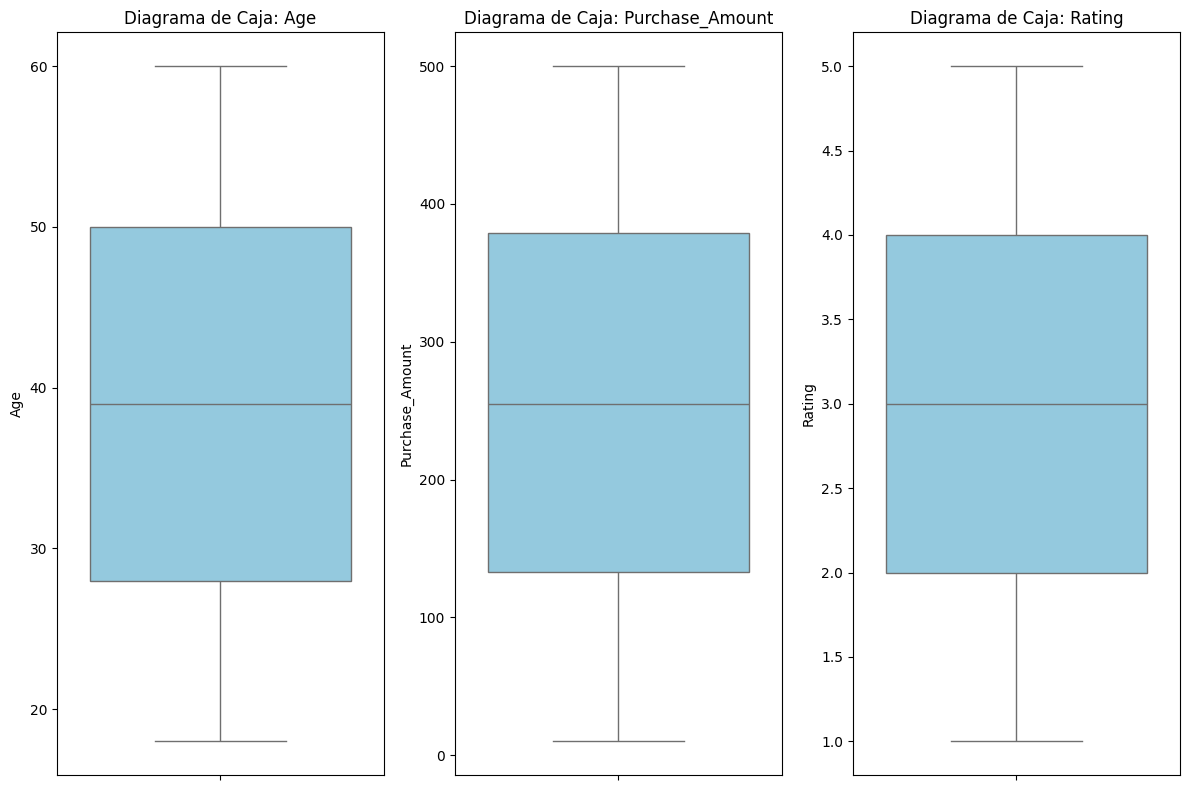

In [21]:
# Visualizar si hay outliers

# Seleccionar únicamente las columnas numéricas
numerical_columns = dato.select_dtypes(include=['number']).columns

# Crear un diagrama de caja (boxplot) para cada columna numérica
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=dato[col], color='skyblue')
    plt.title(f'Diagrama de Caja: {col}')
    plt.ylabel(col)
    plt.tight_layout()  # Ajustar las subtramas

plt.show()


Observacion:

Bigote del grafico, representa el rango intercuartilico (IQR) extendido en 1.5 veces. Los valores que se encuentra fuera de este rango son considerado Outliers

### 4.1.1.9 Codificación de variables Booleanos

In [ ]:
# Estandarizar valores en columnas booleanas (Sí/No)
dato['Repeat_Customer'] = dato['Repeat_Customer'].replace({'YES': 1, 'NO': 0})
dato['Discount_Applied'] = dato['Discount_Applied'].replace({'YES': 1, 'NO': 0})
print(f"Repeat_Customer: {dato['Repeat_Customer'].unique()}")
print(f"Discount_Applied: {dato['Discount_Applied'].unique()}")


## 4.2 Visualización inical

### 4.2.1 Histograma de edades

In [ ]:
dato.describe()

In [ ]:
# Visualizar la edad promedio
print(f"Edad promedio: {dato['Age'].mean():.2f}")

In [ ]:


# Crear un histograma para la frecuencia de la edad
plt.figure(figsize=(10, 6))
sns.histplot(dato['Age'], bins=20, color='skyblue', kde=False)  # kde=False para evitar la línea de densidad
plt.title('Frecuencia de la Edad de los Clientes', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Se observa que los rangos con mayor frecuencia corresponden a las edades de 20, 40 y 60 años

In [ ]:
# visualizar Purchase_Amount por medio de un histograma
plt.figure(figsize=(10, 6))
sns.histplot(dato['Purchase_Amount'], bins=20, color='blue', kde=True)  # kde=True para mostrar la línea de densidad
plt.title('Distribución del Importe de Compra', fontsize=14)
plt.xlabel('Monto Gastado (Purchase_Amount)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

observación
La mayor concentración de gastos parece estar cerca de los valores intermedios del rango, disminuyendo progresivamente hacia los extremos, lo que indica que la mayoría de las compras se encuentran en un monto moderado.